# **Title**

Project title: Analyzing EV Adoption Trends in Washington

Course name: CS 4330

Instructor: Dr. Erdogan Dogdu

Team Name: Regal Royals

1. Shinhyuk Park
2. Devin Dupree
3. Samnang Pech

# **Project Description**

1. EV Adoption Across Geographic Regions: We will begin by analyzing how EVs are distributed across counties, cities, postal codes, and legislative districts in Washington. This will help us identify areas where EVs are more common and understand the factors that influence these adoption patterns. By mapping out these locations, we can determine which areas are leading in EV adoption and which areas may need more support for cleaner transportation.

2. Time-Series Analysis of EV Model Years: Next, we will study how the adoption of EVs has changed over time. By looking at the model years of EVs in the dataset, we can identify growth trends in EV ownership. This analysis will help us understand the pace of EV adoption in Washington and allow us to make predictions about how it may grow in the future.

3. Market Analysis of EV Makes and Models: Lastly, we will examine the popularity of different EV brands and models. We will analyze which makes and models are most popular and how this varies in different regions of Washington. This analysis will provide insights into consumer preferences and market trends for electric vehicles.

# **Dataset**

Name: Electric Vehicle Population Data (Stage of Washington)

Metadata Created Date: November 10, 2020
(This indicates when the metadata for the dataset was first generated).

Metadata Updated Date: November 22, 2024
(This represents the most recent date the metadata was updated to reflect changes or additions to the dataset).

URL: https://catalog.data.gov/dataset/electric-vehicle-population-data

Size: 205440 + 17 features

Features:
- **VIN (1-10):** The first 10 characters of the Vehicle Identification Number, a unique identifier for each vehicle.
- **County:** The county where the vehicle is registered.
- **City:** The city where the vehicle is registered.
- **State:** The state where the vehicle is registered.
- **Postal Code:** The postal code corresponding to the vehicle's registration address.
- **Model Year:** The year the vehicle was manufactured.
- **Make:** The manufacturer of the vehicle (e.g., Tesla, Nissan).
- **Model:** The specific model of the vehicle (e.g., Model 3, Leaf).
- **Electric Vehicle Type:** Whether the vehicle is a battery electric vehicle (BEV) or a plug-in hybrid electric vehicle (PHEV).
- **Clean Alternative Fuel Vehicle:** Whether the vehicle qualifies as a clean alternative fuel vehicle.
- **Electric Range:** The range the vehicle can travel on electric power alone (in miles).
- **Base MSRP:** The Manufacturer’s Suggested Retail Price (base price) of the vehicle.
- **Legislative District:** The legislative district associated with the vehicle's registration.
- **DOL Vehicle ID:** An internal identifier used by the Department of Licensing for the vehicle.
- **Vehicle Location:** The geographical coordinates (latitude and longitude) of the vehicle’s registration location.
- **Electric Utility:** The electric utility provider associated with the vehicle’s registration address.
- **2020 Census Tract:** The census tract where the vehicle is registered, based on the 2020 Census data.

Name: NYSERDA Electric Vehicle Drive Clean Rebate Program

Metadata Created Date: November 12, 2020
(This indicates when the metadata for the dataset was first generated).

Metadata Updated Date: December 6, 2024
(This represents the most recent date the metadata was updated to reflect changes or additions to the dataset).

URL: https://catalog.data.gov/dataset/nyserda-electric-vehicle-drive-clean-rebate-data-beginning-2017

Size: 168,775 + 11 features

Features:
- **Data through Date**: Indicates the data cutoff date for the entry.
- **Submitted Date**: The date when the rebate application was submitted.
- **Make**: The manufacturer of the vehicle (e.g., Jeep).
- **Model**: The specific model of the vehicle (e.g., Wrangler).
- **County**: The county in which the rebate was claimed (e.g., Nassau).
- **ZIP**: The postal code associated with the rebate application.
- **EV Type**: The type of electric vehicle (e.g., Plug-in Hybrid Electric Vehicle (PHEV)).
- **Transaction Type**: Indicates whether the vehicle was purchased or leased.
- **Annual GHG Emissions Reductions (MT CO2e)**: The estimated annual greenhouse - gas emissions reduced by the EV (measured in metric tons of CO2 equivalent).
- **Annual Petroleum Reductions (gallons)**: The estimated annual petroleum saved by using the EV (measured in gallons).
- **Rebate Amount (USD)**: The monetary rebate provided for the EV (in USD).

# **Data Cleanup**

This code imports various Python libraries for data analysis, machine learning, and plotting. It then loads an electric vehicle dataset from an online source (Excel file) into a DataFrame called eCar, preparing it for further analysis.

In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import resample
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import r_regression
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor, export_text
from sklearn import tree, metrics
from sklearn.tree import plot_tree
import matplotlib_inline.backend_inline



url = 'https://raw.githubusercontent.com/shinPark43/CS-4330---Project-Regal-Royals-/main/dataset/Electric_Vehicle_Population_Data.xlsx'
eCar = pd.read_excel(url)

url2 = 'https://raw.githubusercontent.com/shinPark43/CS-4330---Project-Regal-Royals-/main/dataset/NYSERDA_Electric_Vehicle_Drive_Clean_Rebate_Data__Beginning_2017.csv'
eCar2 = pd.read_csv(url2)

* Updated Model Year column without outliers.

1. The code below displays a bar graph showing the count difference between rows with zero values which is inapplicable and those without zero values in the Base MSRP (The Manufacturer’s Suggested Retail Price (base price) of the vehicle) column, indicating a low possibility of this column contributing meaningfully to our analysis.

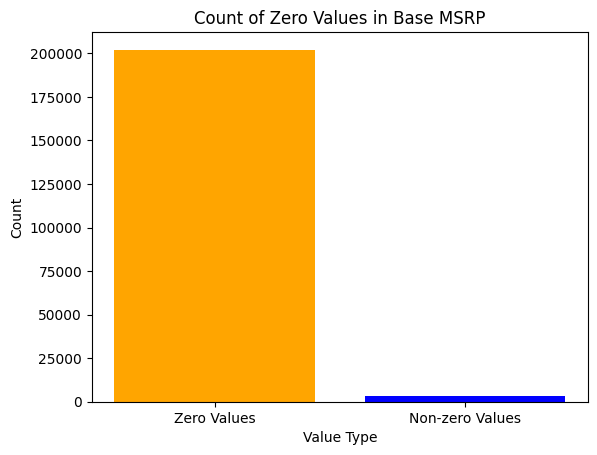

In [40]:
zero_count = (eCar['Base MSRP'] == 0).sum()
total_count = len(eCar)
non_zero_count = total_count - zero_count

x_labels = ['Zero Values', 'Non-zero Values']
y_values = [zero_count, non_zero_count]
plt.bar(x_labels, y_values, color=['orange', 'blue'])
plt.title('Count of Zero Values in Base MSRP')
plt.xlabel('Value Type')
plt.ylabel('Count')
plt.show()

In [41]:
eCar = eCar.drop(columns=['Base MSRP'])
print(eCar.columns)

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Legislative District', 'DOL Vehicle ID', 'Vehicle Location',
       'Electric Utility', '2020 Census Tract'],
      dtype='object')


**Interpretation**
- Since the Base MSRP column has low usability, we can drop it from our dataframe.

2. This code utilizes Tukey's Fences method to identify the outliers in the Model Year column and cleans it by updating the eCar dataframe without the outliers.

In [42]:
Q1 = eCar['Model Year'].quantile(0.25)
Q3 = eCar['Model Year'].quantile(0.75)
IQR_year = Q3 - Q1
low_bound_year = Q1 - 1.5 * IQR_year
upp_bound_year = Q3 + 1.5 * IQR_year

eCar_updated = eCar[(eCar['Model Year'] >= low_bound_year) & (eCar['Model Year'] <= upp_bound_year)]


* Original Model Year column with outliers.

Text(0.5, 1.0, 'Model Year with outliers')

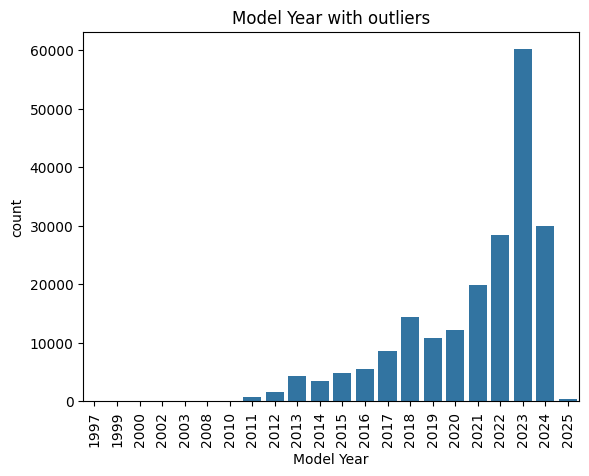

In [43]:
sns.countplot(x='Model Year', data=eCar)
plt.xticks(rotation=90)
plt.title('Model Year with outliers')

* Updated Model Year column without outliers.

Text(0.5, 1.0, 'Model Year without outliers')

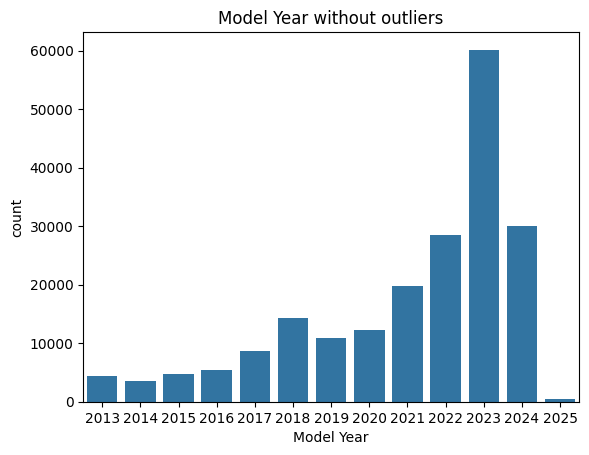

In [44]:
sns.countplot(x='Model Year', data=eCar_updated)
plt.title('Model Year without outliers')

**Interpretation**
- From the results shown in the two graphs, we can interpret that the dataset initially included several outliers in the "Model Year" column, representing years that were far from the main range of data (before 2013). After removing these outliers using the IQR method, the updated graph shows that the data now focuses on vehicles from 2013 to 2025, which appears to be the main range of interest. This filtering step helps make the data cleaner and easier to analyze by excluding years with very few records or irrelevant entries.

# **Data Exploration**

1. This code uses histogram to visualize how many vehicles are from each model year, showing patterns or trends in the data.

Text(0.5, 1.0, 'Histogram of Model Years')

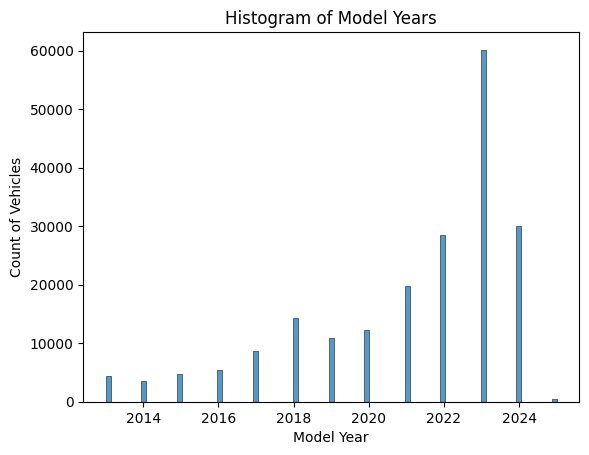

In [48]:
sns.histplot(x='Model Year', data=eCar_updated)
plt.xlabel('Model Year')
plt.ylabel('Count of Vehicles')
plt.title('Histogram of Model Years')

**Interpretation**
- This visualization helps us understand trends in electric vehicle adoption and production over time. For instance, an increase in the number of vehicles for certain years indicates rising popularity or more electric vehicle models being introduced. If recent years have taller bars, it suggests that electric vehicles are gaining popularity or that manufacturers are increasing production. This analysis helps understand how electric vehicle production and consumer interest have evolved over time.

2. This code filters and visualizes data about electric vehicles. First, it removes any rows from the dataset (eCar) that have missing values in the 'Make' or 'Electric Vehicle Type' columns, ensuring only complete records are analyzed. Then, it groups the filtered data by 'Make' (the vehicle manufacturer) and 'Electric Vehicle Type' (e.g., battery electric, plug-in hybrid) to calculate how many vehicles fall into each category. The grouped information is visualized as a bar chart using Seaborn, with different colors representing different electric vehicle types. The chart displays the distribution of various electric vehicle types across different manufacturers, making it easier to understand the popularity of each type among the makes.

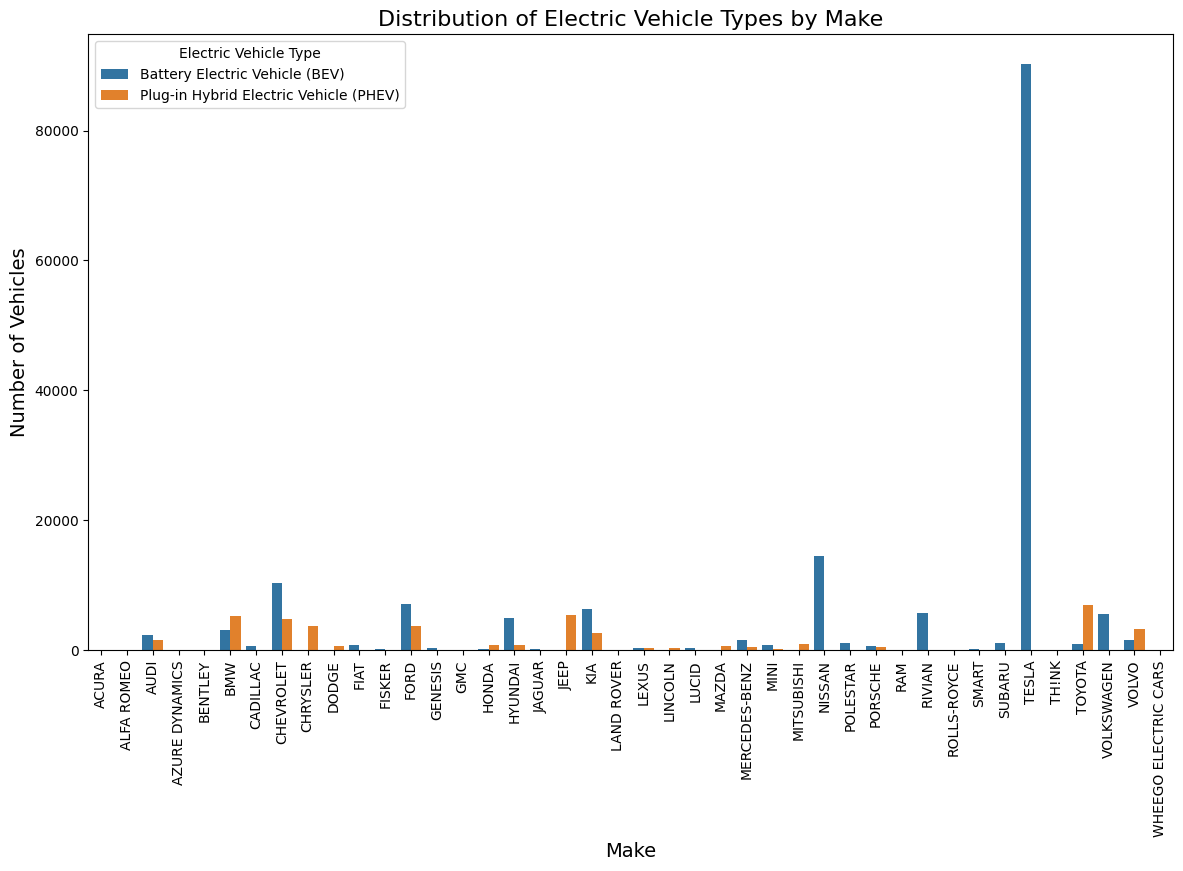

In [49]:
eCar_filtered = eCar.dropna(subset=['Make', 'Electric Vehicle Type'])
vehicle_type_distribution = eCar_filtered.groupby(['Make', 'Electric Vehicle Type']).size().reset_index(name='Count')

plt.figure(figsize=(14, 8))
sns.barplot(x='Make', y='Count', hue='Electric Vehicle Type', data=vehicle_type_distribution)

plt.xlabel('Make', fontsize=14)
plt.ylabel('Number of Vehicles', fontsize=14)
plt.title('Distribution of Electric Vehicle Types by Make', fontsize=16)
plt.xticks(rotation=90)
plt.legend(title='Electric Vehicle Type')
plt.show()

**Interpretation**
- By analyzing the distribution of electric vehicle types by manufacturer, we gain valuable insights into the electric vehicle market in Washington State. This trend analysis highlights which manufacturers, like Tesla, are dominating the market and sheds light on the types of electric vehicles that are becoming increasingly popular among consumers in the region. Such information is crucial for understanding market dynamics and consumer preferences in this area.

3. The code below is creating a box plot that compares the electric range for different car manufacturers. It customizes the size of the plot, adds labels to make it understandable, and ensures the manufacturer names are readable by rotating them. The final output will be a visual summary of how different manufacturers' electric vehicles compare in terms of their range. Any circles in the plot represent outliers, which are data points that fall outside the expected range.

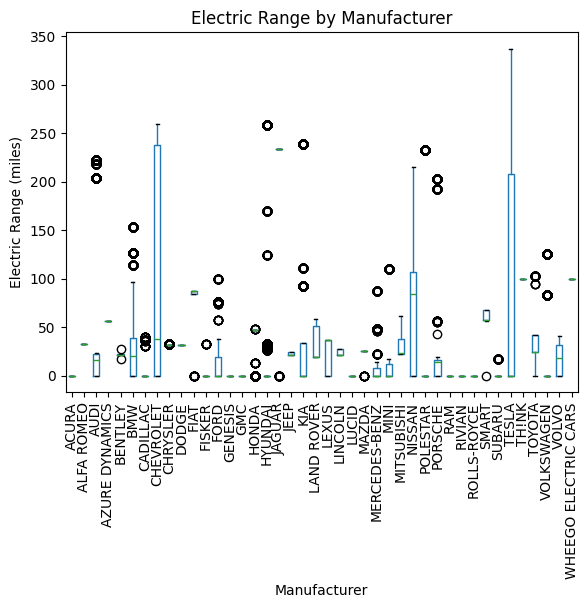

In [50]:
eCar.boxplot(column='Electric Range', by='Make', rot=90, grid=False)
plt.title('Electric Range by Manufacturer')
plt.suptitle('')
plt.xlabel('Manufacturer')
plt.ylabel('Electric Range (miles)')
plt.xticks(rotation=90)
plt.show()

**Interpretation**
- By reviewing this result, you can identify which manufacturers offer a wide variety of electric ranges, indicating a mix of both short-range and long-range models, versus those with more consistent ranges across their vehicles. This suggests the diversity or specialization in their electric vehicle offerings. Manufacturers such as Tesla, Chevrolet, and Nissan stand out due to their broad range of models, which may indicate higher popularity or greater market appeal. This variety likely reflects their ability to cater to different customer needs and preferences.

4. This code classifies counties in Washington State into regions (West, East, North, South, or Other) using a custom function and adds a new column 'Region' to the eCar dataset. It then calculates the number of electric vehicles in each region and creates a bar chart to visualize the distribution. The chart highlights regional differences in electric vehicle adoption, providing insights into which areas have higher or lower usage.

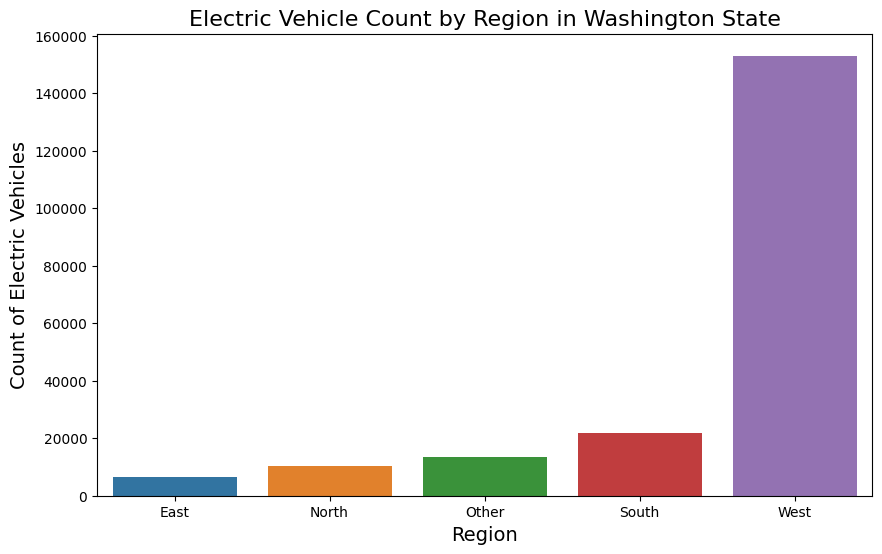

In [51]:
def classify_region(county_or_city):
    west_counties = ['King', 'Pierce', 'Snohomish', 'Kitsap']
    east_counties = ['Spokane', 'Whitman', 'Asotin', 'Grant']
    north_counties = ['Whatcom', 'Skagit', 'Island', 'San Juan']
    south_counties = ['Clark', 'Cowlitz', 'Thurston', 'Lewis']

    if county_or_city in west_counties:
        return 'West'
    elif county_or_city in east_counties:
        return 'East'
    elif county_or_city in north_counties:
        return 'North'
    elif county_or_city in south_counties:
        return 'South'
    else:
        return 'Other'

eCar['Region'] = eCar['County'].apply(classify_region)
region_distribution = eCar.groupby('Region').size().reset_index(name='Count')

plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Count', hue='Region', data=region_distribution, dodge=False)

plt.xlabel('Region', fontsize=14)
plt.ylabel('Count of Electric Vehicles', fontsize=14)
plt.title('Electric Vehicle Count by Region in Washington State', fontsize=16)
plt.show()

**Interpretation**
- From the bar chart, we can interpret that the West region in Washington State has the highest number of registered electric vehicles by a significant margin compared to other regions like East, North, South, and "Other." This indicates that the West region is likely the leading area for electric vehicle adoption, which could be influenced by factors like greater urbanization, better infrastructure, or stronger environmental policies. In contrast, other regions show much lower counts, suggesting a less widespread adoption of electric vehicles in those areas.

# **Regression**

1. Using the linear regression method, we can predict how the adoption rate of electric vehicles (EVs) in Washington State will change in the future. By analyzing historical data, such as the model years of EVs, this approach helps us identify trends and estimate the growth in the number of electric vehicles over time. The resulting predictions can provide insights into how quickly more people are likely to adopt electric vehicles in the coming years, helping us understand and prepare for future changes in the EV market.

Linear Regression RMSE: 12180.728756732033
Linear Regression RRMSE: 0.8896324404316942
Linear Regression MAE: 6707.918730158732


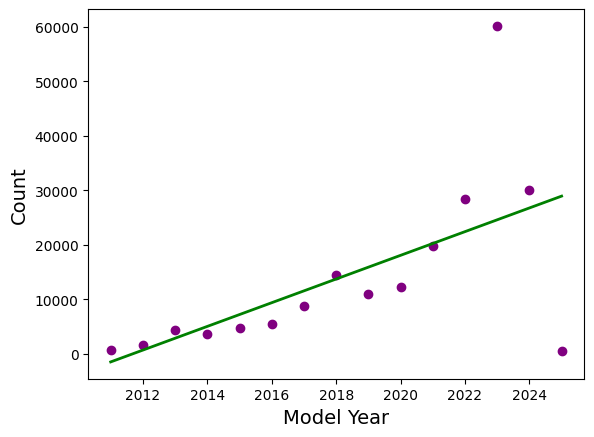

In [53]:
eCar_year = eCar[~((eCar['Model Year'] <= 2010))]
vehicle_count = eCar_year.groupby('Model Year').size().reset_index(name='Count')
ModelYear = vehicle_count[['Model Year']].values.reshape(-1, 1)
TargetYear = vehicle_count[['Count']].values

model = LinearRegression()

model.fit(ModelYear, TargetYear)
ElectricRangePredicted = model.predict(ModelYear)

plt.scatter(ModelYear, TargetYear, color='purple')
plt.plot(ModelYear, ElectricRangePredicted, color='green', linewidth=2)
plt.xlabel('Model Year', fontsize=14)
plt.ylabel('Count', fontsize=14)

LinearMSE = metrics.mean_squared_error(TargetYear, ElectricRangePredicted)
LinearRMSE = np.sqrt(LinearMSE)
print(f"Linear Regression RMSE: {LinearRMSE}")
LinearRMSE = LinearRMSE / np.mean(TargetYear)
print(f"Linear Regression RRMSE: {LinearRMSE}")
LinearMAE = metrics.mean_absolute_error(TargetYear, ElectricRangePredicted)
print(f"Linear Regression MAE: {LinearMAE}")

**Interpretation**
- From this scatter plot with a trend line, we can interpret that the count of electric vehicles has been steadily increasing over the years, as represented by the positive slope of the green line. The data points show that electric vehicles with more recent model years, particularly those from 2022 and beyond, have higher counts compared to earlier years. This indicates a growing trend in the adoption of electric vehicles, possibly due to advancements in technology, increased environmental awareness, or government incentives. However, some extreme data points, such as the spike in 2023 or 2024, suggest that specific years experienced a significant boost in electric vehicle registrations.

2. This code applies polynomial regression to explore the relationship between an electric vehicle's annual petroleum reductions (gallons) and GHG emissions reductions (MT CO2e). The dataset eCar2 is filtered to remove petroleum reductions over 550 gallons to avoid outliers, then split into training and test sets (80/20). Polynomial features of degree 3 are created from the training data, and a linear regression model is trained. The results are visualized with a scatter plot of actual data (black) and the fitted curve (blue).

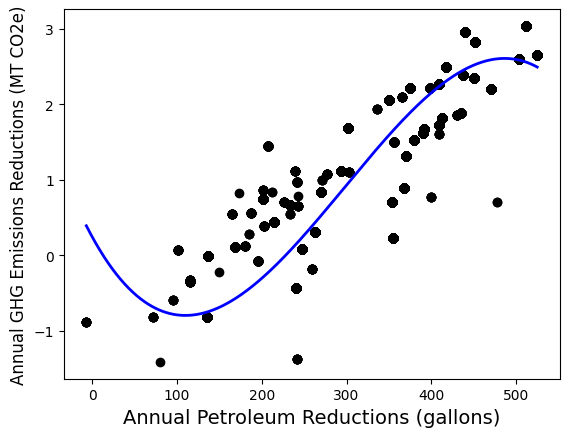

In [54]:
eCar_error = eCar2[~(eCar2['Annual Petroleum Reductions (gallons)'] > 550)]
eCarTrainingData, test_data = train_test_split(eCar_error, test_size=0.20)

X = eCarTrainingData[['Annual Petroleum Reductions (gallons)']].values.reshape(-1, 1)
y = eCarTrainingData[['Annual GHG Emissions Reductions (MT CO2e)']].values.reshape(-1, 1)

polyFeatures = PolynomialFeatures(degree=3, include_bias=False)
XPoly = polyFeatures.fit_transform(X)
polyModel = LinearRegression()
polyModel.fit(XPoly, y)

plt.scatter(X, y, color='black')
xDelta = np.linspace(X.min(), X.max(), 1000)
yDelta = polyModel.predict(polyFeatures.fit_transform(xDelta.reshape(-1, 1)))
plt.plot(xDelta, yDelta, color='blue', linewidth=2)
plt.xlabel('Annual Petroleum Reductions (gallons)', fontsize=14);
plt.ylabel('Annual GHG Emissions Reductions (MT CO2e)', fontsize=12);

**Interpretation**

* We can notice that there is a clear, non-linear relationship between annual petroleum reductions and GHG emissions reductions of electric vehicles. This relationship is effectively captured by the polynomial regression model, as shown by the blue curve fitting the data points.

2. The code below evaluates how well polynomial regression models with degrees ranging from 1 to 6 perform by using a technique called 10-fold cross-validation. For each polynomial degree, it first transforms the input data (X) to include polynomial terms of that degree using PolynomialFeatures. Then, it trains a linear regression model (polyModel) using this transformed data and the target variable (y). The code uses cross-validation to split the data into 10 parts, trains the model on 9 parts, and tests it on the remaining part, repeating this process 10 times. It calculates the mean and standard deviation of the prediction errors (mean squared error) for each degree. The results are stored in two lists - cvMeans for the average errors and cvStdDev for the variability of the errors.

In [55]:
cvMeans = []
cvStdDev = []

for i in range(1, 7):
    polyFeatures = PolynomialFeatures(degree=i, include_bias=False)
    XPoly = polyFeatures.fit_transform(X)
    polyModel = LinearRegression()
    polyModel.fit(XPoly, y)

    polyscore = -cross_val_score(
        polyModel, XPoly, y, scoring='neg_mean_squared_error', cv=10
    )

    cvMeans.append(np.mean(polyscore))
    cvStdDev.append(np.std(polyscore))

3. This code creates a plot to visualize the mean squared error (MSE) of polynomial regression models with degrees ranging from 1 to 6, along with error bars representing variability.

Text(0, 0.5, 'Mean squared error')

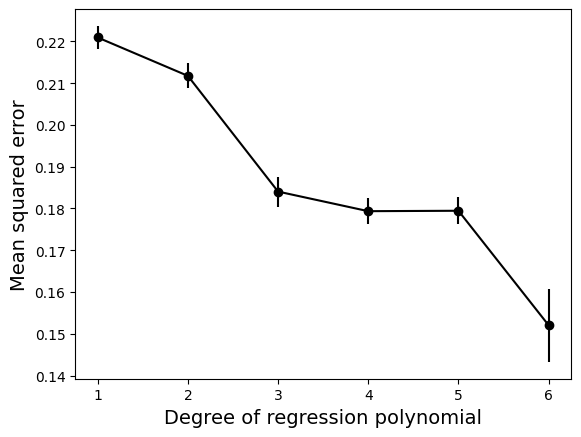

In [56]:
plt.errorbar(x=range(1, 7), y=cvMeans, yerr=cvStdDev, marker='o', color='black')
plt.xlabel('Degree of regression polynomial', fontsize=14)
plt.ylabel('Mean squared error', fontsize=14)

**Interpretation**
* From this result, we can interpret that as the degree of the regression polynomial increases, the mean squared error (MSE) decreases, indicating that higher-degree polynomial models fit the data better. The error bars, which represent the standard deviation of the MSE, remain relatively small for degrees 1 to 5, showing consistent performance across cross-validation folds. However, at degree 6, while the MSE is the lowest, the larger error bar suggests higher variability, which could indicate overfitting. This implies that while increasing the polynomial degree improves the model's accuracy, it may also lead to less generalizable models at higher degrees. Selecting the appropriate degree (such as 3 or 4) balances accuracy and consistency without overfitting.

3. This code trains a logistic regression model to predict whether a vehicle is a Battery Electric Vehicle (BEV) or a Plug-in Hybrid Electric Vehicle (PHEV) based on the Electric Range, and it displays the result using a plot.

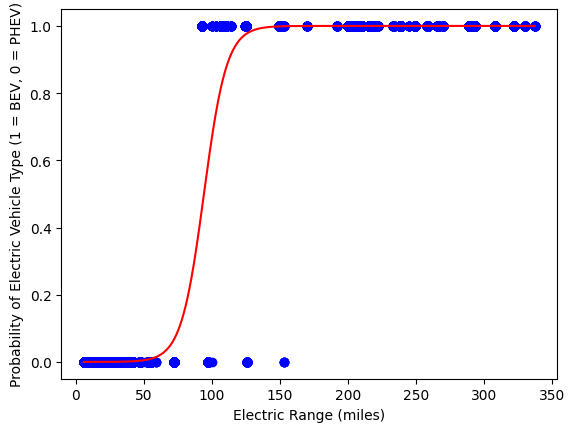

In [61]:
eCar_logistic = eCar.dropna(subset=['Electric Vehicle Type', 'Electric Range'])
eCar_logistic = eCar_logistic[~((eCar_logistic['Electric Vehicle Type'] == 'Battery Electric Vehicle (BEV)') & (eCar_logistic['Electric Range'] < 90))]

eCar_logistic.loc[eCar_logistic['Electric Vehicle Type'] == 'Battery Electric Vehicle (BEV)', 'Electric Vehicle Type'] = 1
eCar_logistic.loc[eCar_logistic['Electric Vehicle Type'] == 'Plug-in Hybrid Electric Vehicle (PHEV)', 'Electric Vehicle Type'] = 0

X = eCar_logistic[['Electric Range']].values.reshape(-1, 1)
y = eCar_logistic[['Electric Vehicle Type']].values.reshape(-1, 1).astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=123
)

logisticModel = LogisticRegression()
logisticModel.fit(X_train, np.ravel(y_train.astype(int)))

plt.scatter(X_test, y_test, color = 'blue')
x_prob = np.linspace(X_test.min(), X_test.max(), 1000)
y_prob = logisticModel.predict_proba(x_prob.reshape(-1, 1))[:, 1]
plt.plot(x_prob, y_prob, color='red')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Probability of Electric Vehicle Type (1 = BEV, 0 = PHEV)')
plt.show()

**Interpretation**
- The logistic regression plot demonstrates a clear relationship between the electric range of vehicles and their classification as either Battery Electric Vehicles (BEVs) or Plug-in Hybrid Electric Vehicles (PHEVs). Vehicles with shorter electric ranges are more likely to be classified as PHEVs (probability close to 0), while those with longer ranges are predominantly classified as BEVs (probability close to 1). The sharp transition around the 90–150 mile range indicates that this is the threshold where the likelihood of a vehicle being classified as a BEV increases significantly. This result suggests that electric range is a key distinguishing feature between these two types of electric vehicles, highlighting the role of range in consumer and manufacturer choices.

2. This code calculates the absolute value of the difference between the observed class and the predicted probability. It then computes the overall absolute loss for this logistic model by averaging the absolute loss values across all instances.

In [62]:
y_pred_proba = logisticModel.predict_proba(X_test)[:, 1]
absolute_loss = mean_absolute_error(y_test, y_pred_proba)
print(f"Overall Absolute Loss for the Logistic Model: {absolute_loss:.2f}")

Overall Absolute Loss for the Logistic Model: 0.01


**Interpretation**
- This low absolute loss suggests that the model is highly accurate, with minimal error in its probability predictions for each instance in the test set.

3. This code calculates the log loss for a logistic model by first predicting the probabilities of each class for instances in the test set (X_test). It then computes the log loss by comparing these predicted probabilities (p_hat) to the observed class (y_test) using the metrics.log_loss function, which quantifies the model's prediction error. Finally, the log loss is printed, giving a quick summary of the model's overall prediction accuracy.

In [63]:
p_hat = logisticModel.predict_proba(X_test)
log_loss = metrics.log_loss(y_test, p_hat)
print(f"Log Loss for the Logistic Model: {log_loss:.2f}")

Log Loss for the Logistic Model: 0.02


**Interpretation**
- This low log loss suggests that logistic model’s predictions are highly accurate, as this indicates minimal deviation between the predicted probabilities and the observed class.

# **Supervised Learning**

This section implements the k-nearest neighbors method and applies it to the consumables usage eCar dataset to demonstrate the effectiveness of the algorithm.


1. This code filters an electric vehicle dataset (eCar) to focus on five specific car manufacturers: Tesla, Ford, Nissan, Chevrolet, and BMW. It ensures that only rows with non-missing values for "Model Year" and "Electric Range" are included and filters for vehicles made from 2010 onwards. The filtered data is then split into features (containing "Model Year" and "Electric Range") and labels (containing the car makes). Using the train_test_split function, the data is divided into training (70%) and testing (30%) sets. A k-nearest neighbors classifier is initialized with 5 neighbors and trained on the training data. Finally, the trained model predicts the car makes for the test set based on the given features.

In [64]:
eCar_five_makes = eCar[eCar['Make'].isin(['TESLA', 'FORD', 'NISSAN', 'CHEVROLET', 'BMW']) & (~eCar[['Model Year', 'Electric Range']].isna().any(axis=1))]
eCar_five_makes = eCar_five_makes[eCar_five_makes['Model Year'] >= 2010]

X_knn = eCar_five_makes[['Model Year', 'Electric Range']].values
y_knn = eCar_five_makes['Make'].values

X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_knn, y_knn, test_size=0.3, random_state=42)

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_knn, y_train_knn)

y_pred_knn = knn_model.predict(X_test_knn)

2. The code below evaluates the accuracy of the k-nearest neighbors model in predicting car manufacturers based on "Model Year" and "Electric Range." The metrics.accuracy_score function compares the predicted car makes with the actual test labels and calculates the model's accuracy, which is printed. It then visualizes the test results using a scatter plot. Each car make is assigned a unique color, and the test data points are plotted with "Model Year" on the x-axis and "Electric Range" on the y-axis. The plot shows how well the k-NN model distinguishes between different car manufacturers and provides a visual understanding of the relationship between the features and the predictions. The legend identifies each color with its corresponding car make.

K-Nearest Neighbors Model Accuracy for Five Makes: 0.8599


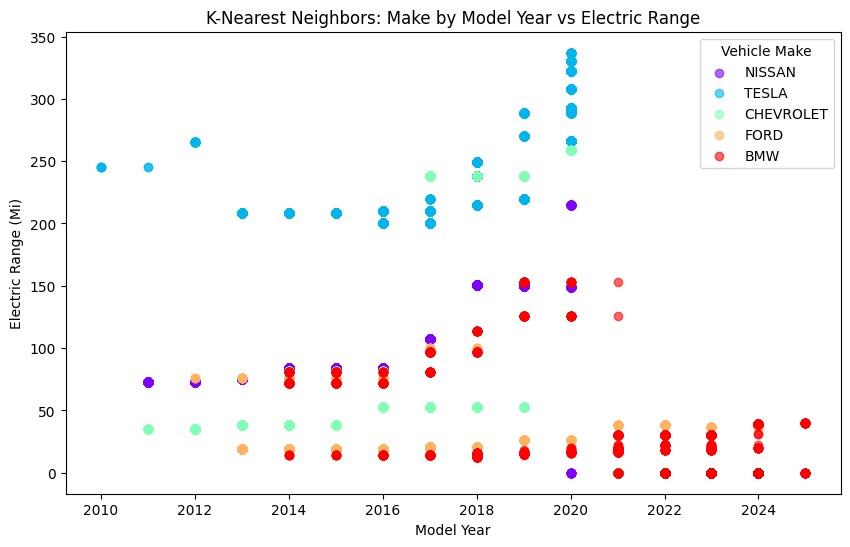

In [65]:
knn_accuracy = metrics.accuracy_score(y_test_knn, y_pred_knn)
print(f"K-Nearest Neighbors Model Accuracy for Five Makes: {knn_accuracy:.4f}")

unique_makes = eCar_five_makes['Make'].unique()
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_makes)))
make_color_map = dict(zip(unique_makes, colors))

plt.figure(figsize=(10, 6))
for make in unique_makes:
    mask = (y_test_knn == make)
    plt.scatter(X_test_knn[mask, 0], X_test_knn[mask, 1], color=make_color_map[make], label=make, alpha=0.6)

plt.xlabel('Model Year')
plt.ylabel('Electric Range (Mi)')
plt.title('K-Nearest Neighbors: Make by Model Year vs Electric Range')
plt.legend(title='Vehicle Make')
plt.show()

**Interpretation**
* From the plot, we can see that the K-Nearest Neighbors (KNN) model effectively differentiates between five car manufacturers (Tesla, Ford, Nissan, Chevrolet, BMW) based on Model Year and Electric Range. The accuracy score of 0.8599 suggests the model performs well in predicting the vehicle make, with each manufacturer represented by a distinct color. Tesla vehicles (blue points) are generally concentrated at higher electric ranges, while Ford, Chevrolet, BMW, and Nissan are distributed across various ranges. This indicates that Tesla focuses on longer ranges, while the other manufacturers offer a mix of electric range capabilities. The distinct separation of colors in the plot shows that the KNN model is able to distinguish between different manufacturers fairly clearly based on these two features.

# **Unsupervised Learning**

This section utilizes the k-means clustering method and applies it to the consumables usage dataset (Annual GHG Emissions Reductions [MT CO2e] and Annual Petroleum Reductions [gallons]), demonstrating the effectiveness of the algorithm.

1. Clean the Data and Select Features

The data is cleaned by removing rows with missing values. Two features are selected for clustering: Annual GHG Emissions Reductions (MT CO2e) and Annual Petroleum Reductions (gallons). These features represent environmental and fuel efficiency impacts.

In [66]:
eCar2 = eCar2.dropna()
X = eCar2[['Annual GHG Emissions Reductions (MT CO2e)', 'Annual Petroleum Reductions (gallons)']]

**Interpretation**


*   The result is a clean dataset focused on meaningful attributes. Clustering will likely group the data into categories of low, moderate, and high environmental and fuel efficiency impact. These groups can highlight areas or vehicles that need improvement or are performing well.




2. Apply K-means Clustering

K-means is applied with 3 clusters. Each data point is assigned to a cluster, and centroids are calculated as the average characteristics of the clusters.

In [67]:
kmeans = KMeans(n_clusters=3, random_state=0)
eCar2['Cluster'] = kmeans.fit_predict(X)

centroids = kmeans.cluster_centers_
print("Centroids of clusters:\n", centroids)

Centroids of clusters:
 [[ 2.89753863e+00  5.91832356e+02]
 [-2.57332059e-01  1.87765130e+02]
 [ 2.37462565e+00  4.41127992e+02]]


**Interpretation**


*   The clusters represent different performance levels. Cluster 0, with the highest GHG reduction (2.90 MT CO2e) and petroleum savings (592 gallons), shows excellent performance. Cluster 1, with minimal GHG reduction (-0.26 MT CO2e) and low petroleum savings (188 gallons), highlights underperformers needing improvement. Cluster 2, with moderate reductions (2.37 MT CO2e, 441 gallons), represents average performers. These clusters help identify areas of excellence and opportunities for improvement.




3. Visualize the Clusters

A scatter plot shows the data points grouped by clusters, with centroids marked as red "X". Each cluster is color-coded for easy identificatio

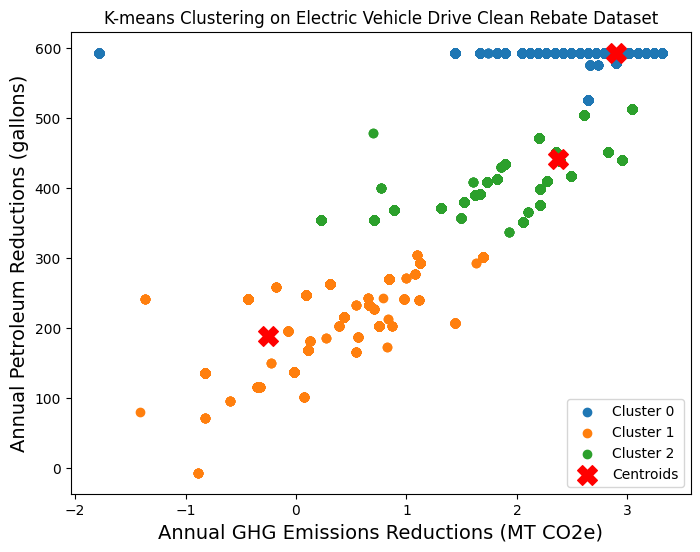

In [68]:
plt.figure(figsize=(8, 6))

for cluster in range(3):
    cluster_data = eCar2[eCar2['Cluster'] == cluster]
    plt.scatter(cluster_data['Annual GHG Emissions Reductions (MT CO2e)'],
                cluster_data['Annual Petroleum Reductions (gallons)'],
                label=f'Cluster {cluster}')

plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')

plt.xlabel('Annual GHG Emissions Reductions (MT CO2e)', fontsize=14)
plt.ylabel('Annual Petroleum Reductions (gallons)', fontsize=14)
plt.title('K-means Clustering on Electric Vehicle Drive Clean Rebate Dataset')
plt.legend()
plt.show()

**Interpretation**


*   The scatter plot shows three clusters based on GHG emissions reductions and petroleum savings. Cluster 0 (Blue) represents the best-performing group, with the highest GHG reductions (2.90 MT CO2e) and petroleum savings (592 gallons). Cluster 1 (Orange) represents the lowest-performing group, characterized by minimal or negative GHG reductions (-0.26 MT CO2e) and low petroleum savings (188 gallons). Cluster 2 (Green) reflects moderate performance, with GHG reductions (2.37 MT CO2e) and petroleum savings (441 gallons). This clustering effectively separates the data, identifying areas of excellence (Cluster 0), underperformance (Cluster 1), and average results (Cluster 2), which provides a framework for targeted improvements.




4. Evaluate Clustering with Elbow Method

The elbow method calculates WCSS for 1 to 5 clusters. A plot shows how WCSS decreases as the number of clusters increases, with the "elbow point" indicating the best cluster count.

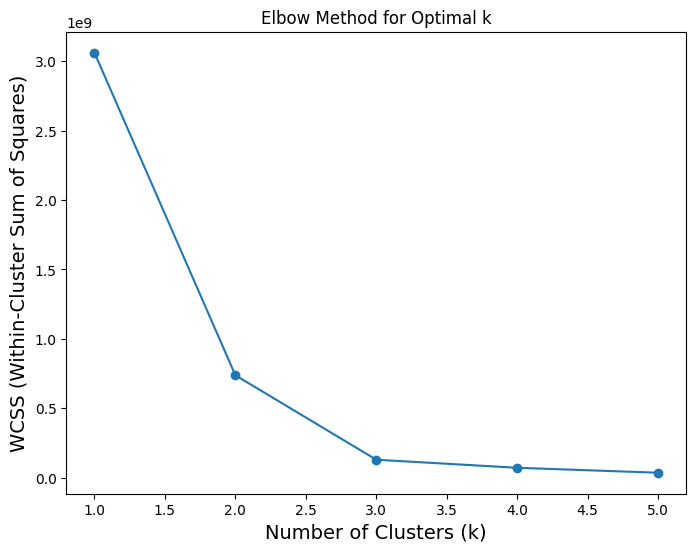

In [69]:
WCSS = []
k_values = range(1, 6)

for k in k_values:
    km = KMeans(n_clusters=k, random_state=0)
    km.fit(X)
    WCSS.append(km.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_values, WCSS, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)', fontsize=14)
plt.ylabel('WCSS (Within-Cluster Sum of Squares)', fontsize=14)
plt.show()

**Interpretation:**

The plot shows that WCSS decreases sharply from 1 to 3 clusters, indicating significant improvement in clustering quality. Beyond 3 clusters, the rate of improvement slows considerably, forming an "elbow" at k = 3. This suggests that 3 clusters is the optimal choice for this dataset, balancing simplicity and effectiveness.

# **Decision Trees**

1. The code builds and evaluates a decision tree model to predict the electric range of vehicles based on their model year. It provides numerical metrics (MSE and R²) to assess the model's accuracy and visualizes the decision tree structure, allowing users to understand how decisions are made based on the data. This approach is useful for analyzing relationships between variables and making interpretable predictions.

Mean Squared Error: 2359.21
R-squared: 0.70


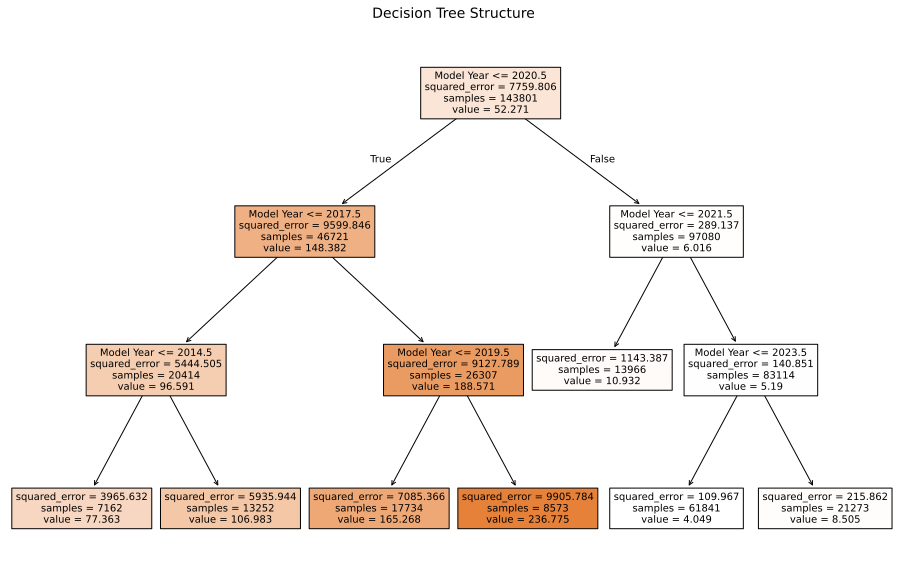

In [75]:
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

eCar_mul = eCar.dropna(subset=['Electric Range', 'Model Year'])

X = eCar_mul[['Model Year']]
y = eCar_mul['Electric Range']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

decision_tree_model = DecisionTreeRegressor(max_depth=3, random_state=42)
decision_tree_model.fit(X_train, y_train)

y_pred = decision_tree_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

plt.figure(figsize=(16, 10))
plot_tree(decision_tree_model, feature_names=['Model Year'], filled=True, fontsize=10)
plt.title('Decision Tree Structure', fontsize=14)
plt.show()

**Interpretation**
- The decision tree visualization and metrics indicate that the electric range of vehicles is influenced by their model year, with the tree splitting the data based on specific year thresholds. The tree's structure shows that newer model years are generally associated with lower electric ranges, which may represent older electric vehicle (EV) models having higher ranges or a significant presence of hybrid vehicles in recent years. The decision tree model, with a maximum depth of 3, achieves an 𝑅^2 score of 0.70. The Mean Squared Error (MSE) of 2359.21 highlights the average squared difference between predicted and actual electric ranges. This tree provides interpretable insights into how the electric range varies across different model years

# **Conclusion**

In conclusion, this project provides an in-depth understanding of the adoption patterns, market trends, and production dynamics of electric vehicles (EVs) in Washington State, offering valuable insights for policymakers, manufacturers, and consumers. Through our analysis, we identified key geographic, temporal, and market trends that highlight both the progress made in EV adoption and areas where significant opportunities for improvement remain.

First, the geographic analysis showed that the West region of Washington leads in EV adoption by a significant margin compared to regions like the East, North, and South. This disparity is likely driven by factors such as greater urbanization, more developed charging infrastructure, higher incomes, and stronger environmental policies in urban centers. In contrast, regions with lower adoption rates may face challenges such as insufficient charging networks, less public awareness, and fewer financial incentives. Addressing these barriers through targeted investments in infrastructure, incentives, and public education campaigns could help bridge the gap in EV adoption and promote equitable access to clean transportation across all regions of the state.

The time-series analysis revealed a clear upward trend in EV adoption, with registrations increasing steadily over the years. The spike in registrations for recent model years, particularly in 2023 and 2024, reflects growing consumer interest, advancements in EV technology, and the impact of government incentives such as tax credits and rebates. However, the analysis also highlights the importance of maintaining this momentum. Future efforts should focus on expanding consumer access to affordable EV options, supporting the development of battery technology for longer ranges, and addressing concerns related to the environmental impact of battery production and disposal.

Our market analysis of EV makes and models shed light on consumer preferences and market dynamics. Manufacturers like Tesla dominate the market with their focus on long-range vehicles, while brands like Chevrolet and Nissan provide a diverse mix of models, catering to a wide range of customer needs. This diversity in offerings is essential for meeting the demands of different segments of the population, from urban commuters to long-distance travelers. To further strengthen the market, manufacturers could explore opportunities to reduce costs, expand the availability of mid-range EVs, and improve customer education on the benefits of switching to electric transportation.

The decision tree analysis provided insights into how the electric range of vehicles is influenced by their model year. Interestingly, newer model years are often associated with shorter electric ranges, which may reflect the growing presence of plug-in hybrids in the market or a shift in consumer priorities toward more affordable EV options. While the decision tree model achieved a good 𝑅^2 score of 0.70, there is room for improvement in predictive accuracy. Incorporating additional features such as battery capacity, charging speed, and vehicle size into the analysis could help create a more comprehensive model for predicting electric ranges and understanding consumer preferences.

Despite the valuable insights generated through this project, there are several areas for future improvement. One limitation of the analysis is the reliance on a single state's dataset, which may not fully capture broader national or global trends in EV adoption. Expanding the analysis to include data from other regions or countries could provide a more holistic perspective. Additionally, integrating external factors such as the availability of charging stations, energy prices, and regional emissions policies would enhance the robustness of the findings. Finally, further research into the lifecycle environmental impacts of EV production and disposal is essential for guiding sustainable growth in the EV industry.

In summary, this project highlights the rapid growth and evolving dynamics of EV adoption in Washington State, while also identifying challenges and opportunities for improvement. By addressing regional disparities, fostering innovation in EV technology, and supporting a more sustainable EV ecosystem, we can accelerate the transition to cleaner transportation and contribute to a greener future for all.